<a href="https://colab.research.google.com/github/LEOFRANKLIN2003/Heart-Disease-Prediction/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Load the Dataset
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
print(f"number of null values : {data.isnull().sum().sum()}")

number of null values : 0


In [ ]:
#Identifying the Outliers
z_scores = np.abs(stats.zscore(data))
threshold = 3
outlier_rows, outlier_cols = np.where(z_scores > threshold)
print("Outlier rows and columns:")
print(list(zip(outlier_rows, outlier_cols)))

Outlier rows and columns:
[(28, 4), (48, 12), (85, 4), (92, 11), (158, 11), (163, 11), (164, 11), (204, 9), (220, 4), (221, 9), (223, 3), (246, 4), (248, 3), (251, 11), (272, 7), (281, 12)]


In [ ]:
#Handling Outliers
data = data[(z_scores < threshold).all(axis=1)]


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,287.0,54.334495,9.093125,29.0,47.0,55.0,61.0,77.0
sex,287.0,0.689895,0.463344,0.0,0.0,1.0,1.0,1.0
cp,287.0,0.972125,1.037373,0.0,0.0,1.0,2.0,3.0
trestbps,287.0,131.024390,16.991856,94.0,120.0,130.0,140.0,180.0
chol,287.0,244.501742,45.920719,126.0,211.0,241.0,274.0,394.0
fbs,287.0,0.142857,0.350538,0.0,0.0,0.0,0.0,1.0
restecg,287.0,0.533101,0.527017,0.0,0.0,1.0,1.0,2.0
thalach,287.0,149.804878,22.550570,88.0,133.5,153.0,166.0,202.0
exang,287.0,0.327526,0.470131,0.0,0.0,0.0,1.0,1.0
oldpeak,287.0,1.004878,1.080684,0.0,0.0,0.8,1.6,4.4


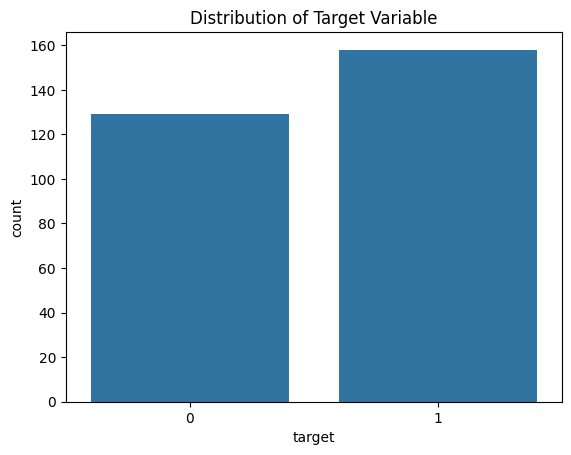

In [ ]:
#EDA
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.show()

Axes(0.125,0.11;0.775x0.77)


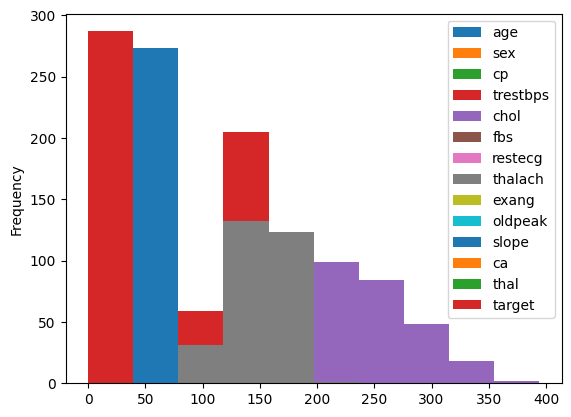

In [ ]:
print(data.plot(kind='hist'))

In [ ]:
# Split the dataset into features (X) and labels (y)
X = data.drop('target', axis=1).values
Y = data['target'].values

In [ ]:
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [ ]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
# Normalize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[ 0.32390999,  0.66245673,  1.0435958 , ...,  0.95814773,
        -0.73240961, -0.58072358],
       [ 0.21336051,  0.66245673, -0.93478487, ..., -2.31757101,
        -0.73240961,  1.15277964],
       [-1.11323332,  0.66245673,  1.0435958 , ...,  0.95814773,
        -0.73240961, -0.58072358],
       ...,
       [ 0.87665742,  0.66245673,  0.05440547, ..., -0.67971164,
         0.35264167,  1.15277964],
       [ 1.0977564 ,  0.66245673, -0.93478487, ..., -2.31757101,
         0.35264167, -0.58072358],
       [ 0.43445948, -1.50953255, -0.93478487, ..., -0.67971164,
         1.43769294, -2.31422681]])

In [ ]:
X_train

array([[ 0.87665742, -1.50953255, -0.93478487, ..., -0.67971164,
        -0.73240961, -0.58072358],
       [-0.00773846, -1.50953255,  1.0435958 , ...,  0.95814773,
        -0.73240961, -0.58072358],
       [-0.00773846,  0.66245673, -0.93478487, ..., -0.67971164,
         0.35264167,  1.15277964],
       ...,
       [ 1.0977564 , -1.50953255, -0.93478487, ...,  0.95814773,
        -0.73240961, -0.58072358],
       [ 0.54500897,  0.66245673,  2.03278614, ...,  0.95814773,
         1.43769294, -0.58072358],
       [ 1.65050383,  0.66245673,  2.03278614, ..., -0.67971164,
         0.35264167, -0.58072358]])

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print()

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Model - 1**

In [ ]:
import tensorflow as tf

In [ ]:
# Create a simple feedforward neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
#Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train,y_train, epochs=20,batch_size=15,validation_split=0.4)

Epoch 1/20
8/8 [==============================] - 2s 61ms/step - loss: 0.6113 - accuracy: 0.7250 - val_loss: 0.6016 - val_accuracy: 0.7250
Epoch 2/20
8/8 [==============================] - 0s 19ms/step - loss: 0.5373 - accuracy: 0.8333 - val_loss: 0.5551 - val_accuracy: 0.8000
Epoch 3/20
8/8 [==============================] - 0s 30ms/step - loss: 0.4781 - accuracy: 0.8667 - val_loss: 0.5187 - val_accuracy: 0.8000
Epoch 4/20
8/8 [==============================] - 0s 28ms/step - loss: 0.4254 - accuracy: 0.8667 - val_loss: 0.4918 - val_accuracy: 0.8000
Epoch 5/20
8/8 [==============================] - 0s 20ms/step - loss: 0.3839 - accuracy: 0.8667 - val_loss: 0.4711 - val_accuracy: 0.8125
Epoch 6/20
8/8 [==============================] - 0s 15ms/step - loss: 0.3517 - accuracy: 0.8667 - val_loss: 0.4578 - val_accuracy: 0.8125
Epoch 7/20
8/8 [==============================] - 0s 31ms/step - loss: 0.3266 - accuracy: 0.8750 - val_loss: 0.4486 - val_accuracy: 0.8125
Epoch 8/20
8/8 [===========

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Make predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Convert boolean to integer for metrics calculation
y_pred = y_pred.astype(int)


3/3 [==============================] - 0s 3ms/step


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 12ms/step - loss: 0.4781 - accuracy: 0.7931


Accuracy of FNN for Heart Disease Prediction is : 0.7931034482758621
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.85      0.76        34
           1       0.89      0.75      0.82        53

    accuracy                           0.79        87
   macro avg       0.79      0.80      0.79        87
weighted avg       0.81      0.79      0.80        87




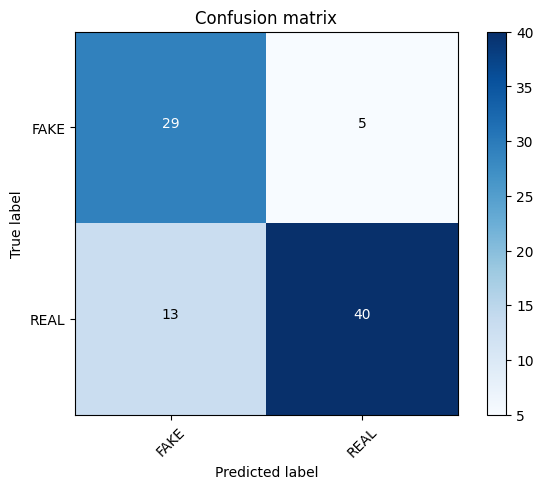

In [ ]:
# Accuracy,Evaluation Matrix
accuracy_1 = accuracy_score(y_test, y_pred)
print("Accuracy of FNN for Heart Disease Prediction is :",accuracy_1)


print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

**Model - 2**

In [ ]:
#Import Library for K-nearest neighbor Algorithm
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Predicting the best Value of K for KNN classification
accuracy_list = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

best_k = accuracy_list.index(max(accuracy_list)) + 1
print("Best K value:", best_k)

Best K value: 5


In [ ]:
#Creating Knn Model
Knn=KNeighborsClassifier(n_neighbors=best_k)

In [ ]:
#Train the model
Knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
#predicting test data using Knn
y_pred = Knn.predict(X_test)

Accuracy of KNN for Heart Disease Prediction is : 0.8505747126436781
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.82        34
           1       0.90      0.85      0.87        53

    accuracy                           0.85        87
   macro avg       0.84      0.85      0.85        87
weighted avg       0.85      0.85      0.85        87




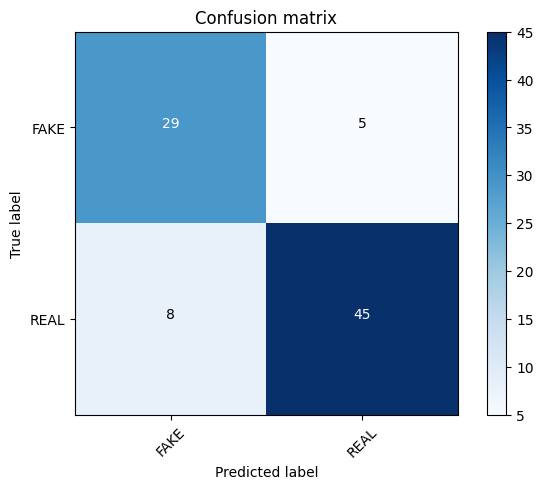

In [ ]:
# Accuracy,Evaluation Matrix
accuracy_2 = accuracy_score(y_test, y_pred)
print("Accuracy of KNN for Heart Disease Prediction is :",accuracy_2)


print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred )
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

**Model - 3**

In [ ]:
# Import Libray for Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
#Creating Logistic Regression Model
lr=LogisticRegression()

In [ ]:
# Train the model
lr.fit(X_train , y_train)

LogisticRegression()

In [ ]:
# Predict on the test set
y_pred = lr.predict(X_test)

Accuracy of LR for Heart Disease Prediction is : 0.8620689655172413
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        34
           1       0.89      0.89      0.89        53

    accuracy                           0.86        87
   macro avg       0.86      0.86      0.86        87
weighted avg       0.86      0.86      0.86        87




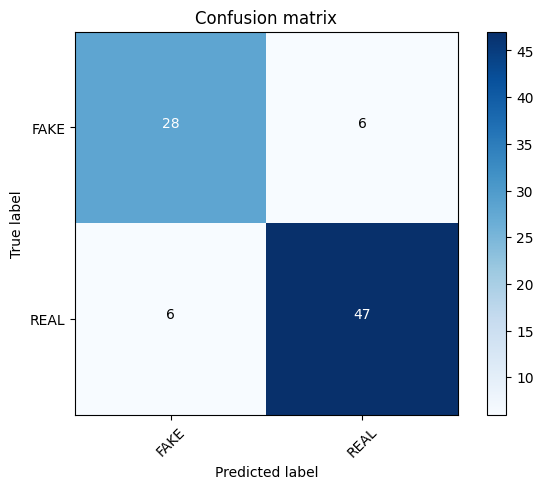

In [ ]:
# Accuracy,Evaluation Matrix
accuracy_3 = accuracy_score(y_test, y_pred)
print("Accuracy of LR for Heart Disease Prediction is :",accuracy_3)


print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred )
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

**Model-4**

In [ ]:
# Import Libray for Support Vector Machine
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='linear', random_state=42)

In [ ]:
# Train the model
svm.fit(X_train , y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Predict on the test set
y_pred = svm.predict(X_test)

Accuracy of SVM for Heart Disease Prediction is : 0.8505747126436781
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81        34
           1       0.87      0.89      0.88        53

    accuracy                           0.85        87
   macro avg       0.84      0.84      0.84        87
weighted avg       0.85      0.85      0.85        87




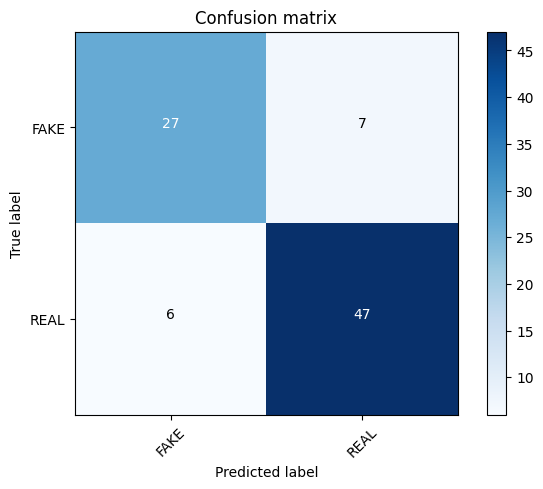

In [ ]:
# Accuracy,Evaluation Matrix
accuracy_4 = accuracy_score(y_test, y_pred)
print("Accuracy of SVM for Heart Disease Prediction is :",accuracy_4)


print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred )
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

**Model-5**

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting_classifier = VotingClassifier(estimators=[ ('KNN', Knn), ('LR',lr), ('SVM',svm)], voting='hard')

In [ ]:
voting_classifier.fit(X_train , y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier()),
                             ('LR', LogisticRegression()),
                             ('SVM', SVC(kernel='linear', random_state=42))])

In [ ]:
y_pred = voting_classifier.predict(X_test)

Accuracy of Our Model for Heart Disease Prediction is : 0.8735632183908046
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        34
           1       0.90      0.89      0.90        53

    accuracy                           0.87        87
   macro avg       0.87      0.87      0.87        87
weighted avg       0.87      0.87      0.87        87




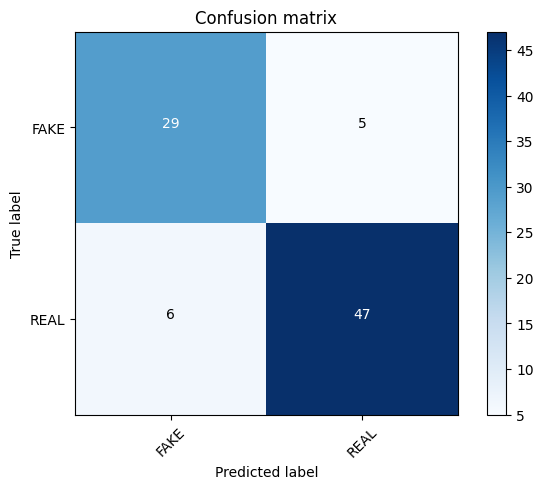

In [ ]:
# Accuracy,Evaluation Matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Our Model for Heart Disease Prediction is :",accuracy)


print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred )
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

**Comparision**

In [ ]:
Result={"FNN":accuracy_1,"KNN":accuracy_2,"LR":accuracy_3,"SVM":accuracy_4,"Our Model":accuracy}

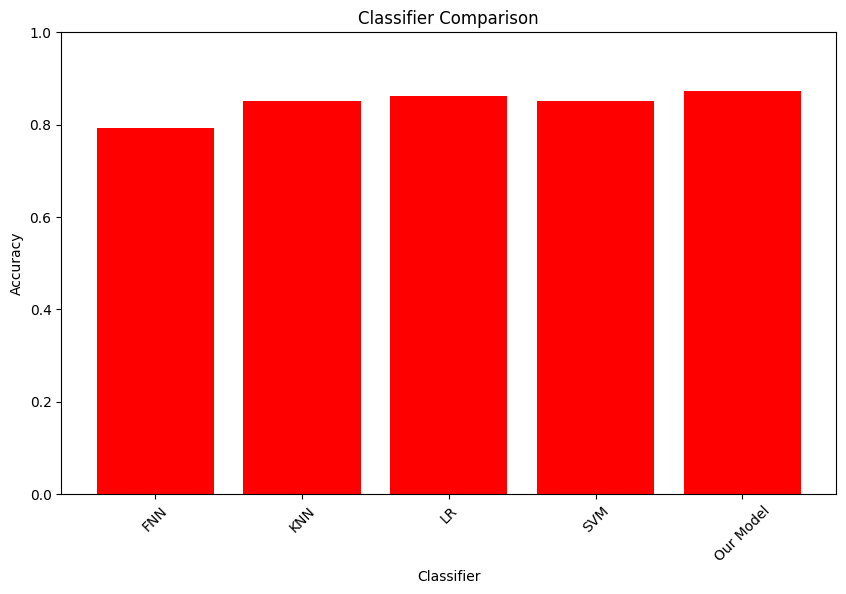

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(Result.keys(), Result.values(), color='red')
plt.title('Classifier Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()